In [3]:
# Project Title: [Air BNB Hotel Bookings Analysis]
# Author: [Chandra Sekhar Jarugumalli]
# Date:  October 4, 2025
# Project for: VOIS_AICTE_Oct2025

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df = pd.read_csv(r'C:\Users\cs611\Downloads\1730285881-Airbnb_Open_Data.csv',low_memory=False)

In [7]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [10]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [14]:
df[df['neighbourhood group'] == 'Brooklyn']



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,05-10-2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,05-10-2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
16,1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,United States,...,NaN,2.0,148.0,29-06-2019,1.20,3.0,1.0,197.0,"Absolutely no smoking in the building, handlin...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102587,6088571,Adorable One-Bed in Williamsburg!,20914678851,verified,Taylor,Brooklyn,Williamsburg,40.71687,-73.94656,United States,...,$78,1.0,66.0,16-06-2019,1.35,2.0,1.0,352.0,• Check-in time is 2PM. Check-out time is 11am...,NaN
102589,6089676,Lrg room 1 block from Prospect Park,74549151787,unconfirmed,Dave,Brooklyn,Flatbush,40.65231,-73.96189,United States,...,$61,3.0,0.0,NaN,NaN,1.0,1.0,200.0,House Rules 1. Check-in is 4 pm local time. If...,NaN
102590,6090228,Wonderful artists' loft in Brooklyn,9184535139,unconfirmed,Daniel,Brooklyn,Crown Heights,40.66673,-73.96127,United States,...,$50,1.0,0.0,NaN,NaN,1.0,1.0,276.0,#NAME?,NaN
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN


In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df.drop(['house_rules', 'license'], axis=1, inplace=True)


In [24]:
# 3. Remove all dollar signs in 'price' and 'service_fee' columns
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False).astype(float)
df['service fee'] = df['service fee'].str.replace(',', '', regex=False).astype(float)



In [34]:
# Remove all commas in 'price' and 'service fee' columns
df['price'] = df['price'].astype(str).str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace(',', '', regex=False)

# Convert both columns to float after cleaning
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)



In [43]:
# Rename the columns to include a dollar sign
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)
# Drop all records with missing values
df.dropna(inplace=True)

# Convert date columns
for date_col in ['host_since', 'last_review']:
    if date_col in df.columns:
        df.loc[:, date_col] = pd.to_datetime(df[date_col], errors='coerce', dayfirst=True)

# Convert integer columns
for int_col in ['host_id', 'host_total_listings_count', 'construction_year']:
    if int_col in df.columns:
        df.loc[:, int_col] = pd.to_numeric(df[int_col], errors='coerce').astype('Int64')

# Fix spelling error
if 'neighbourhood_group' in df.columns:
    df.loc[:, 'neighbourhood_group'] = df['neighbourhood_group'].replace('brookln', 'Brooklyn')

In [45]:
df = df.drop(df[df['availability_365'] > 500].index)


In [46]:
df.duplicated().value_counts()

False    82697
Name: count, dtype: int64

In [47]:
df.info

<bound method DataFrame.info of               id                                               name  \
0        1001254                 Clean & quiet apt home by the park   
1        1002102                              Skylit Midtown Castle   
4        1003689   Entire Apt: Spacious Studio/Loft by central park   
7        1005202                                    BlissArtsSpace!   
8        1005754                    Large Furnished Room Near B'way   
...          ...                                                ...   
102052  57364656  ☀️Private, cozy & quiet room in Inwood Manhatt...   
102053  57365208                Cozy bright room near Prospect Park   
102054  57365760          Private Bedroom with Amazing Rooftop View   
102055  57366313      Pretty Brooklyn One-Bedroom for 2 to 4 people   
102057  57367417                                    Rosalee Stewart   

            host_id host_identity_verified host_name neighbourhood_group  \
0       80014485718            unconfir

In [55]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df['room_type'].unique())
room_type_counts = df['room_type'].value_counts().to_frame()
room_type_counts.columns = ['count']
print(room_type_counts)



['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
                 count
room_type             
Entire home/apt  43668
Private room     37275
Shared room       1642
Hotel room         112


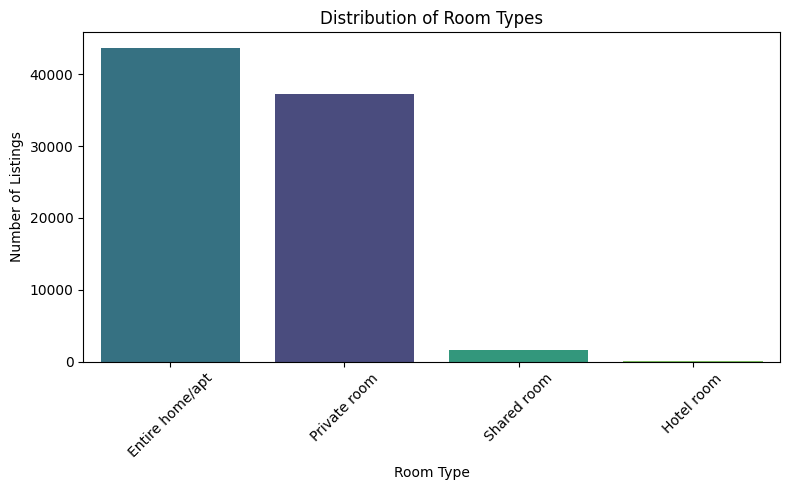

In [63]:
# Standardize column names to avoid KeyError
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Plot room type distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', hue='room_type', order=df['room_type'].value_counts().index, palette='viridis', legend=False)

plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

neighbourhood_group
Brooklyn         34294
Manhattan        34183
Queens           11120
Bronx             2281
Staten Island      819
Name: count, dtype: int64

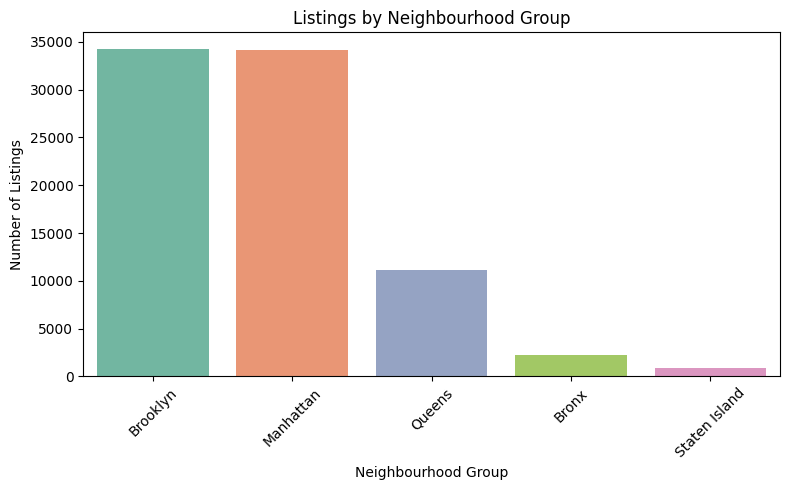

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='neighbourhood_group', hue='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index, palette='Set2', legend=False)

plt.title('Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [66]:
avg_price_by_group = df.groupby('neighbourhood_group')['price_$'].mean().sort_values(ascending=False)


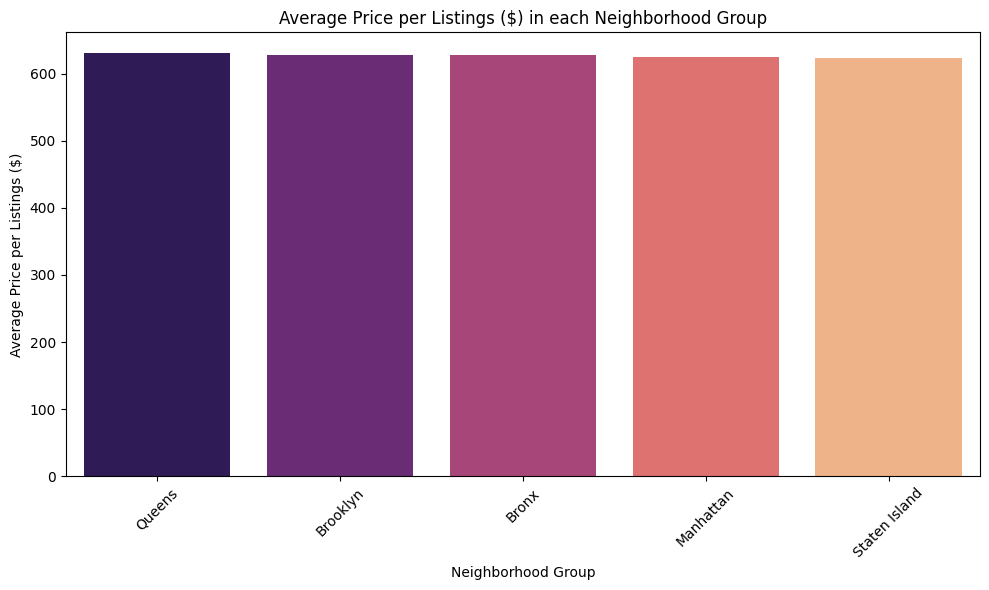

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean column names (if not already done)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: Calculate average price per neighborhood group
avg_price_by_group = df.groupby('neighbourhood_group')['price_$'].mean().sort_values(ascending=False)

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_group.index, y=avg_price_by_group.values, hue=avg_price_by_group.index, palette='magma', legend=False)
plt.title('Average Price per Listings ($) in each Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listings ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [72]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


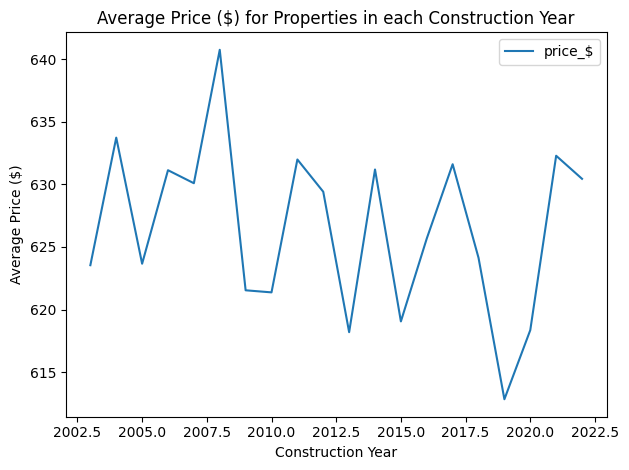

In [73]:
# Is there a relationship between the construction year of property and price?
df.groupby('construction_year')['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')
plt.tight_layout()
plt.show()


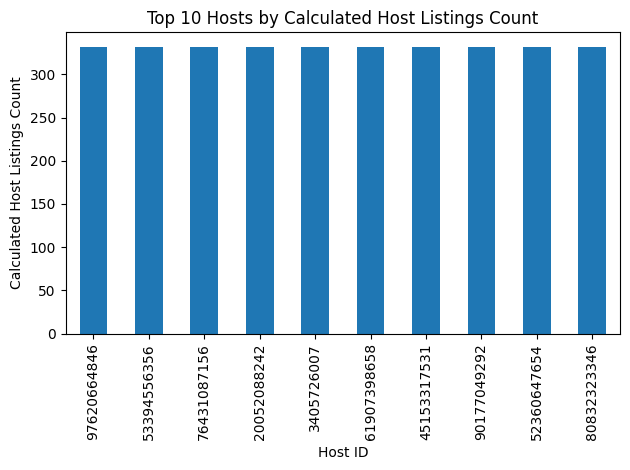

In [77]:
# Top 10 hosts by calculated host listing count
top_10_hosts.plot(kind='bar', title='Top 10 Hosts by Calculated Host Listings Count', legend=False)
plt.xlabel('Host ID')
plt.ylabel('Calculated Host Listings Count')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.tight_layout()
plt.show()


In [81]:
# Standardize column names if not already done
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Group by host identity verification status and calculate average review rating
review = df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending=False).to_frame()

# Display the result
print(review)


                        review_rate_number
host_identity_verified                    
verified                          3.288535
unconfirmed                       3.280413


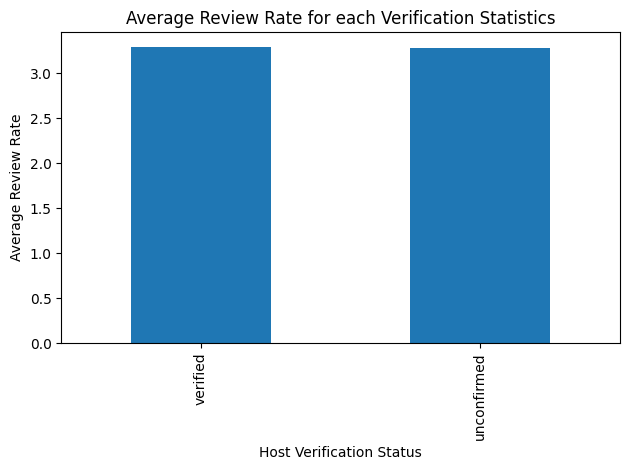

In [82]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Group by host identity verification status and calculate average review rate
review = df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending=False).to_frame()

# Plot the bar chart
review.plot(kind='bar', legend=False)
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Verification Statistics')
plt.tight_layout()
plt.show()


In [87]:
df['price_$'].corr(df['service_fee_$'])


np.float64(0.9977588129947073)

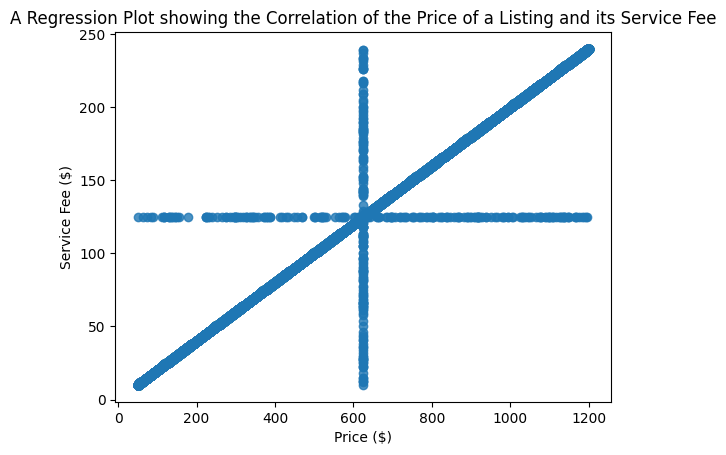

In [88]:
sns.regplot(x='price_$', y='service_fee_$', data=df)
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.show()

In [90]:
df.groupby(['neighbourhood_group', 'room_type'])['review_rate_number'].mean().to_frame()



review_rate_number
neighbourhood_group room_type                          
Bronx               Entire home/apt            3.376136
                    Private room               3.321918
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.249772
                    Hotel room                 3.833333
                    Private room               3.281180
                    Shared room                3.320261
Manhattan           Entire home/apt            3.271725
                    Hotel room                 3.489796
                    Private room               3.291747
                    Shared room                3.254186
Queens              Entire home/apt            3.356415
                    Hotel room                 3.750000
                    Private room               3.320549
                    Shared room                3.326165
Staten Island       Entire home/apt            3.324645
                    Private room               3.492308
                    Shared room                3.714286

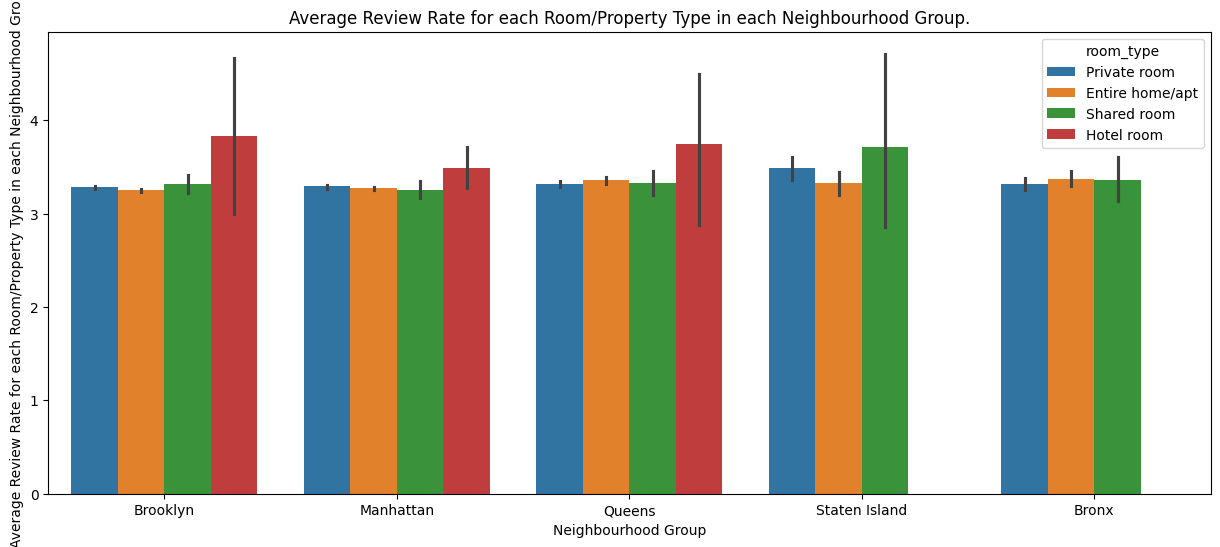

In [91]:
plt.figure(figsize=(15,6))
sns.barplot(x='neighbourhood_group', y='review_rate_number', hue='room_type', data=df)
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate for each Room/Property Type in each Neighbourhood Group.')
plt.show()


Text(0.5, 1.0, 'A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

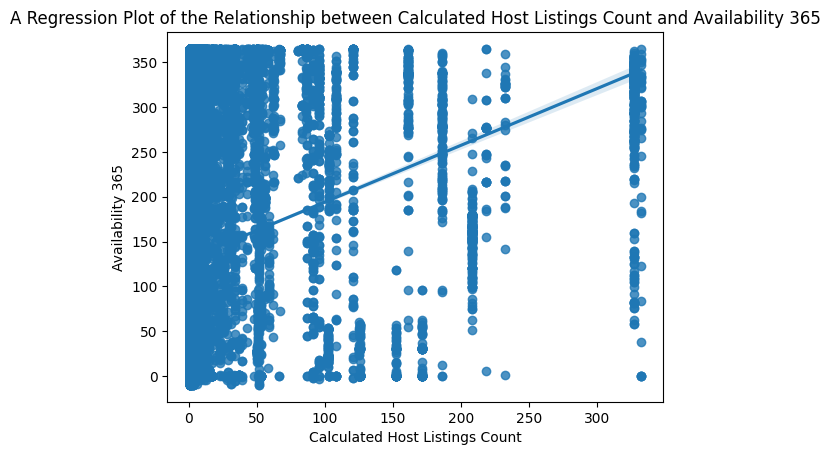

In [92]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x='calculated_host_listings_count', y='availability_365')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')


In [93]:
df['calculated_host_listings_count'].corr(df['availability_365'])


np.float64(0.1471838139005934)